# Diabetes and Its Socioeconomic Predictors

## Data
The data and documentation for the 2023 BRFSS survery can be found at https://www.cdc.gov/brfss/annual_data/annual_2023.html. The data is avaialable to download in SAS (.xpt) format and can be read in using the pandas python library.

In [2]:
import pandas as pd

# Read in the SAS file with multiple spaces as delimiter
df = pd.read_sas("LLCP2023.XPT ")

In [9]:
df.describe()

,_STATE,FMONTH,DISPCODE,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
count,433323.000000,433323.000000,433323.000000,4.333230e+05,88345.0,88345.000000,12.0,88345.000000,88346.000000,88345.000000,...,4.333230e+05,433323.000000,4.333230e+05,433323.000000,170823.000000,170823.000000,403710.000000,433323.000000,433323.000000,433323.000000
mean,30.486898,6.612273,1117.783963,2.023005e+09,1.0,1.000136,1.0,1.000011,2.000023,1.001505,...,7.746976e+01,1.739282,7.826639e+03,1.660750,2.138272,2.270057,2.028681,1.633470,1.698735,5.565327
std,16.670560,3.518848,38.237812,4.455869e+03,0.0,0.011654,0.0,0.003364,0.006729,0.038771,...,2.256125e+02,2.123753,2.637115e+04,2.113355,2.368834,2.618224,1.686731,2.074538,2.069306,3.515690
min,1.000000,1.000000,1100.000000,2.023000e+09,1.0,1.000000,1.0,1.000000,2.000000,1.000000,...,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,3.000000,1100.000000,2.023002e+09,1.0,1.000000,1.0,1.000000,2.000000,1.000000,...,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,29.000000,7.000000,1100.000000,2.023004e+09,1.0,1.000000,1.0,1.000000,2.000000,1.000000,...,3.000000e+00,1.000000,4.700000e+01,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,9.000000
75%,45.000000,10.000000,1100.000000,2.023008e+09,1.0,1.000000,1.0,1.000000,2.000000,1.000000,...,2.900000e+01,1.000000,4.000000e+02,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,9.000000
max,78.000000,12.000000,1200.000000,2.023026e+09,1.0,2.000000,1.0,2.000000,4.000000,2.000000,...,9.000000e+02,9.000000,9.990000e+04,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


Feedback from the proposal indicates that socio-economic factors should be favored over health indicators from the survey due to the nature of the survey not measuring how an individual developed these health issues over time.

The codebook was consulted and these socioeconomic variables were loaded into the dataframe for analysis:

In [2]:
#Selecting variables to examine based on relevance of socio+economic status
df = df[["PVTRESD1", #Private Residence 
                 "COLGHOUS", #College Housing
                  "STATERE1", #State Resident
                  "NUMADULT", #Number of adults in household
                  "BIRTHSEX", #Sex of interviewee
                  "PHYSHLTH", #Number of days physical health is not good
                  "MENTHLTH", #Number of days mental health is not good
                  "PERSDOC3", #Has a personal healthcare provider
                  "MEDCOST1", #Could not afford to see a doctor
                  "CHECKUP1", #Length of time since last routine checkup
                  "EXERANY2", #Exercise in past 30 days
                  #"BPHIGH6", #Ever been told blood pressude high
                  #"TOLDHI3", #Ever told Cholestoral is high
                  "MARITAL", #Marital Status
                  "EDUCA", #Education Level
                  "RENTHOM1", #Own or rent a home
                  "VETERAN3", #Veteran Status
                  "EMPLOY1", #Employment Status
                  "CHILDREN", #Number of children in household
                  "FIREARM5", #Any firearms in home
                  "ACEDRINK", #Live with heavy drinkers
                  "ACEDEPRS", #live with depressed people
                  "ACEDRUGS", #live with people who use illegal drugs
                  "ACEDIVRC", #parents divorced or seperated?
                  "COVIDNU2", #COvid vaccinations received
                  "LSATISFY", #satisfaction with life
                  "SDHEMPLY", #Lost employment
                  "FOODSTMP", #receiving foodstamps
                  "SDHBILLS", #ability to pay bills
                  "_METSTAT", #metropolitan status
                  "_RFSEAT3",#Always wearing seatbelts
                  "DIABETE4" 
                 ]]
df.shape

(433323, 30)

There are 433323 observations across 34 variables, these variables will be re-encoded to allign with traditional ML practices. For example in the BRFSS 1 is yes and 2 is no, whereas traditionally 1 is yes and 0 is no to allow for traditional encoding of dummy variables.

In [3]:
import numpy as np
# Encoding Variables for consisteny in a new clean data frame (1 is yes, 0 is no)
clean_df = pd.DataFrame()
clean_df['PrivateResidence'] = df["PVTRESD1"].replace({1: 1, 2: 0})
clean_df['Male'] = df["BIRTHSEX"].replace([2,7,9],[0,0,0])
clean_df['StateResident'] = df["STATERE1"].replace({1: 1, 2: 0})
clean_df['DaysPhysHealthNotGood'] = df["PHYSHLTH"].replace([88,77,99,30],0)
clean_df['DaysMentalHealthNotGood'] = df["MENTHLTH"].replace([88,77,99,30],0)
clean_df['HasHealthcareProvider'] = df["PERSDOC3"].replace([2,3,7,9],[0,0,0,0])
clean_df['CouldNotAffordDoctor'] = df["MEDCOST1"].replace([2,7,9],[0,0,0])
clean_df['CheckUpinLast5Years'] = df["CHECKUP1"].replace([1,2,3,4,7,8,9],[1,1,1,0,0,0,0])
clean_df['ExerciseIn30Days'] = df["EXERANY2"].replace([2,7,9],[0,0,0])
#clean_df['BeenToldBloodPressureHigh'] = df["BPHIGH6"].replace([1,2,3,4,7,9],[1,1,0,1,0,0])
#clean_df['BeenToldBloodCholestorolHigh'] = df["TOLDHI3"].replace([2,7,9],[0,0,0])
clean_df['MaritalStatus'] = df["MARITAL"].replace([1,2,3,4,5,6,9],["Married","Divorced","Widowed","Divorced","No","No",0])
clean_df['EducationLevel'] = df["EDUCA"].replace([1,2,3,4,5,6,9],["No","Elementary","Started High School","Finished High School","Started College", "Finished College",0])
clean_df['OwnOrRentHome'] = df["RENTHOM1"].replace([1,2,3,7,9],["Own","Rent","No","No",0])
clean_df['AreYouAVeteran'] = df["VETERAN3"].replace([2,7,9],[0,0,0])
clean_df['EmploymentStatus'] = df["EMPLOY1"].replace([1,2,3,4,5,6,7,8,9],["Yes","Yes","No","No","No","Student","Retired","Unable","No"])
clean_df['NumberOfChildrenInHome'] = df["CHILDREN"].replace([88,99],[0,0])
clean_df['FireArmsInHome'] = df["FIREARM5"].replace([2,7,9],[0,0,0])
clean_df['LiveWithAlocholic'] = df["ACEDRINK"].replace([2,7,9],[0,0,0])
clean_df['LiveWithDrugsAbuser'] = df["ACEDRUGS"].replace([2,7,9],[0,0,0])
clean_df['LiveWithMentallyIll'] = df["ACEDEPRS"].replace([2,7,9],[0,0,0])
clean_df['LiveWithOnlyOneParent'] = df["ACEDIVRC"].replace([2,7,8,9],[0,0,1,0])
clean_df['CovidVaccinesReceived'] = df["COVIDNU2"].replace([7,9],[0,0])
clean_df['SatisficationWithLife'] = df["LSATISFY"].replace([1,2,3,4,7,9],["Very Satisfied","Satisfied","Dissastisfied","Very Dissatsisfied",0,0])
clean_df['LostEmploymentInLastYear'] = df["SDHEMPLY"].replace([2,7,9],[0,0,0])
clean_df['FoodStampInLastYear'] = df["FOODSTMP"].replace([2,7,9],[0,0,0])
clean_df['UnpaidBillInLastYear'] = df["SDHBILLS"].replace([2,7,9],[0,0,0])
clean_df['LiveInMetropolitanArea'] = df["_METSTAT"].replace([2],[0])
clean_df['WearsSeatbelt'] = df["_RFSEAT3"].replace([2,9],[0,0])
clean_df['DiabetesTARGET'] = df["DIABETE4"].replace([1,2,3,4,7,9],[1,1,0,0,0,0]) #1=Yes 1, 2=yes,Female,Pregnant ,3=No, 4=No or prediabetes, 7=Unknown, 9=Refused


df = clean_df #save over the originial dataframe with the new clean dataframe

df.describe()

,PrivateResidence,Male,StateResident,DaysPhysHealthNotGood,DaysMentalHealthNotGood,HasHealthcareProvider,CouldNotAffordDoctor,CheckUpinLast5Years,ExerciseIn30Days,AreYouAVeteran,...,LiveWithDrugsAbuser,LiveWithMentallyIll,LiveWithOnlyOneParent,CovidVaccinesReceived,LostEmploymentInLastYear,FoodStampInLastYear,UnpaidBillInLastYear,LiveInMetropolitanArea,WearsSeatbelt,DiabetesTARGET
count,88345.000000,105230.000000,88345.000000,433320.000000,433320.000000,433320.000000,433321.000000,433321.000000,433321.000000,432104.000000,...,55891.000000,56040.000000,55808.000000,110754.000000,225739.00000,225475.000000,224861.000000,425000.000000,433323.000000,433318.000000
mean,0.999864,0.462226,0.999989,2.057013,2.506369,0.540912,0.085844,0.939391,0.750545,0.118046,...,0.104185,0.189258,0.285228,3.065758,0.08854,0.096578,0.089095,0.724132,0.810204,0.145480
std,0.011654,0.498573,0.003364,4.682440,5.213947,0.498324,0.280134,0.238611,0.432698,0.322663,...,0.305503,0.391717,0.451527,1.157596,0.28408,0.295383,0.284882,0.446951,0.392140,0.352584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,4.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,29.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df['DiabetesTARGET'].head(10)

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
5    0.0
6    0.0
7    1.0
8    0.0
9    1.0
Name: DiabetesTARGET, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PrivateResidence          88345 non-null   float64
 1   Male                      105230 non-null  float64
 2   StateResident             88345 non-null   float64
 3   DaysPhysHealthNotGood     433320 non-null  float64
 4   DaysMentalHealthNotGood   433320 non-null  float64
 5   HasHealthcareProvider     433320 non-null  float64
 6   CouldNotAffordDoctor      433321 non-null  float64
 7   CheckUpinLast5Years       433321 non-null  float64
 8   ExerciseIn30Days          433321 non-null  float64
 9   MaritalStatus             433316 non-null  object 
 10  EducationLevel            433314 non-null  object 
 11  OwnOrRentHome             433315 non-null  object 
 12  AreYouAVeteran            432104 non-null  float64
 13  EmploymentStatus          430355 non-null  o

The info() function reveals that many of these variables have missing inputs, this makes sense as all questions of the survey were optional. The describe command also shows that the only true numeric variables select are days in which physical or mental health were not good in the past month. The rest of the numeric variables are binary categorical and have been converted into dummy numerical variables.

Histograms of these two numeric variables will be shown below.

array([[<Axes: title={'center': 'DaysPhysHealthNotGood'}>,
        <Axes: title={'center': 'DaysMentalHealthNotGood'}>]],
      dtype=object)

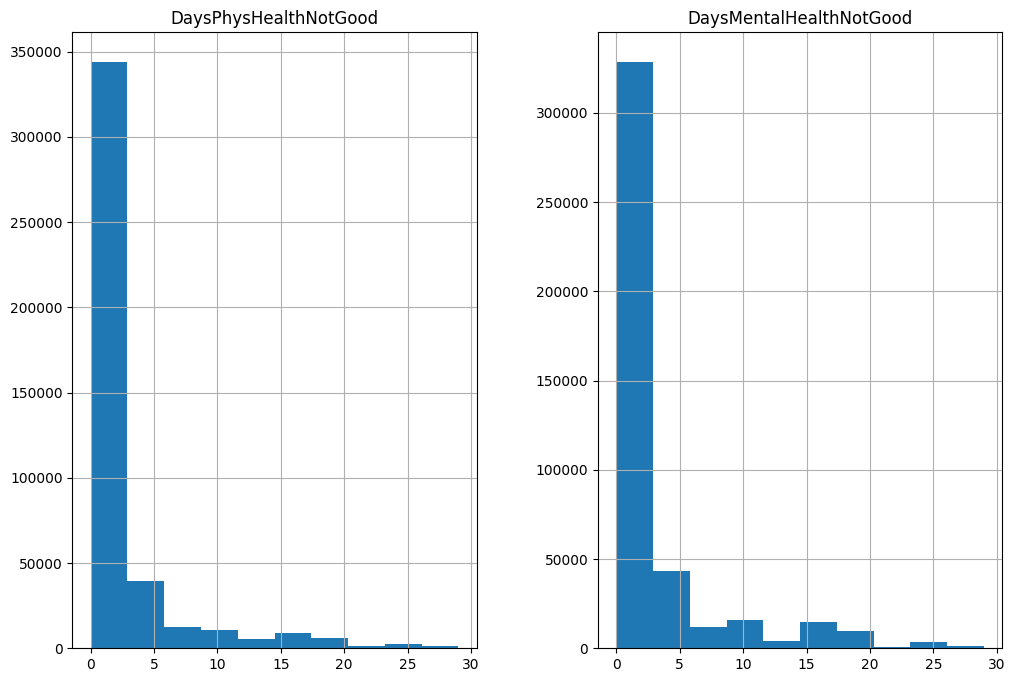

In [7]:
df[["DaysPhysHealthNotGood","DaysMentalHealthNotGood"]].hist(figsize=(12,8))


Both of these variables are skewed to the right, with days where mental health isn't good having a little bit more variablity has days increase as compared to its physical health counterpart. The mean for these variables is close together between 6 and 8 and the median is also close with 4 for physical health and 5 for mental health. Correlation needs to be tested for these two variables.

In [8]:
health_variables = ["DaysPhysHealthNotGood","DaysMentalHealthNotGood"]
corr_matrix = df[health_variables].corr(numeric_only=True)
corr_matrix

,DaysPhysHealthNotGood,DaysMentalHealthNotGood
DaysPhysHealthNotGood,1.000000,0.203517
DaysMentalHealthNotGood,0.203517,1.000000


The correlation is not as strong as predicted so these two variables can be used together in analyses. 

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(include=['float64']).columns.tolist()
corr_matrix = df[numeric_columns].corr(numeric_only=True)
corr_matrix

,PrivateResidence,Male,StateResident,DaysPhysHealthNotGood,DaysMentalHealthNotGood,HasHealthcareProvider,CouldNotAffordDoctor,CheckUpinLast5Years,ExerciseIn30Days,AreYouAVeteran,...,LiveWithDrugsAbuser,LiveWithMentallyIll,LiveWithOnlyOneParent,CovidVaccinesReceived,LostEmploymentInLastYear,FoodStampInLastYear,UnpaidBillInLastYear,LiveInMetropolitanArea,WearsSeatbelt,DiabetesTARGET
PrivateResidence,1.000000,0.005218,-0.000039,-0.001352,0.001988,-0.002186,-0.003073,-0.002167,-0.001665,-0.003217,...,NaN,NaN,NaN,-0.008346,0.001604,-0.015370,0.001735,-0.002650,0.000089,-0.001362
Male,0.005218,1.000000,NaN,-0.060091,-0.080105,0.003062,-0.017105,-0.090653,0.064434,0.310293,...,0.003303,-0.068283,0.006857,-0.031043,0.032323,-0.086112,-0.042108,0.008068,-0.080648,-0.007223
StateResident,-0.000039,NaN,1.000000,0.000070,0.001290,-0.002899,0.000640,-0.000626,-0.002289,0.001422,...,NaN,NaN,NaN,NaN,0.000802,0.001179,0.000868,-0.002527,-0.001489,0.001698
DaysPhysHealthNotGood,-0.001352,-0.060091,0.000070,1.000000,0.203517,-0.049568,0.097344,0.021030,-0.094095,-0.004830,...,0.055417,0.082885,0.041634,0.000430,0.039623,0.090800,0.103095,-0.004768,-0.004485,0.075979
DaysMentalHealthNotGood,0.001988,-0.080105,0.001290,0.203517,1.000000,-0.043689,0.144235,-0.006723,-0.022782,-0.043217,...,0.118498,0.197439,0.100844,-0.038792,0.098585,0.083839,0.135010,0.027189,-0.019366,-0.005215
HasHealthcareProvider,-0.002186,0.003062,-0.002899,-0.049568,-0.043689,1.000000,-0.077068,0.142554,0.018273,-0.009938,...,-0.030427,-0.036102,-0.025456,0.006919,-0.046424,-0.006522,-0.050951,-0.047707,0.017244,-0.005295
CouldNotAffordDoctor,-0.003073,-0.017105,0.000640,0.097344,0.144235,-0.077068,1.000000,-0.108494,-0.047536,-0.053428,...,0.128638,0.141880,0.119894,-0.093845,0.196218,0.085713,0.291176,0.012840,-0.045191,-0.000457
CheckUpinLast5Years,-0.002167,-0.090653,-0.000626,0.021030,-0.006723,0.142554,-0.108494,1.000000,0.016732,0.031562,...,-0.053720,-0.028334,-0.057248,0.098472,-0.061262,-0.000505,-0.051953,0.018361,0.060365,0.072599
ExerciseIn30Days,-0.001665,0.064434,-0.002289,-0.094095,-0.022782,0.018273,-0.047536,0.016732,1.000000,-0.006213,...,0.009394,0.034654,-0.017706,0.058596,-0.015069,-0.126499,-0.092180,0.054122,0.057567,-0.139207
AreYouAVeteran,-0.003217,0.310293,0.001422,-0.004830,-0.043217,-0.009938,-0.053428,0.031562,-0.006213,1.000000,...,-0.024669,-0.053053,-0.015405,0.018982,-0.046552,-0.061029,-0.049249,-0.012938,0.004661,0.053469


There do not appear to be any noticeable correlations which should be avoided when running models in the next steps.

In [10]:


sce_df = df
sce_df.head()

,PrivateResidence,Male,StateResident,DaysPhysHealthNotGood,DaysMentalHealthNotGood,HasHealthcareProvider,CouldNotAffordDoctor,CheckUpinLast5Years,ExerciseIn30Days,MaritalStatus,...,LiveWithMentallyIll,LiveWithOnlyOneParent,CovidVaccinesReceived,SatisficationWithLife,LostEmploymentInLastYear,FoodStampInLastYear,UnpaidBillInLastYear,LiveInMetropolitanArea,WearsSeatbelt,DiabetesTARGET
0,1.0,NaN,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Married,...,NaN,NaN,NaN,Satisfied,0.0,0.0,0.0,1.0,1.0,1.0
1,1.0,NaN,1.0,0.0,0.0,1.0,0.0,1.0,1.0,Divorced,...,NaN,NaN,NaN,Very Satisfied,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,NaN,1.0,6.0,2.0,1.0,1.0,1.0,1.0,Widowed,...,NaN,NaN,NaN,Satisfied,0.0,0.0,1.0,1.0,1.0,0.0
3,1.0,NaN,1.0,2.0,0.0,1.0,0.0,1.0,1.0,Married,...,NaN,NaN,NaN,Very Satisfied,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,NaN,1.0,0.0,0.0,1.0,0.0,1.0,1.0,Widowed,...,NaN,NaN,NaN,Satisfied,0.0,0.0,0.0,1.0,1.0,1.0


In [11]:
print(sce_df.isnull().sum())

PrivateResidence            344978
Male                        328093
StateResident               344978
DaysPhysHealthNotGood            3
DaysMentalHealthNotGood          3
HasHealthcareProvider            3
CouldNotAffordDoctor             2
CheckUpinLast5Years              2
ExerciseIn30Days                 2
MaritalStatus                    7
EducationLevel                   9
OwnOrRentHome                    8
AreYouAVeteran                1219
EmploymentStatus              2968
NumberOfChildrenInHome        5092
FireArmsInHome              352013
LiveWithAlocholic           377384
LiveWithDrugsAbuser         377432
LiveWithMentallyIll         377283
LiveWithOnlyOneParent       377515
CovidVaccinesReceived       322569
SatisficationWithLife       206647
LostEmploymentInLastYear    207584
FoodStampInLastYear         207848
UnpaidBillInLastYear        208462
LiveInMetropolitanArea        8323
WearsSeatbelt                    0
DiabetesTARGET                   5
dtype: int64


Imputations

In [12]:
# 1. Continuous Variables (using median imputation)
cont_cols = [
    "DaysPhysHealthNotGood",
    "DaysMentalHealthNotGood",
    "NumberOfChildrenInHome",
    "CovidVaccinesReceived"
]
sce_df[cont_cols] = sce_df[cont_cols].fillna(sce_df[cont_cols].median())


In [13]:
# 2. Binary Variables (using mode imputation)
binary_cols = [
    "PrivateResidence",
    "Male",
    "StateResident",
    "HasHealthcareProvider",
    "CouldNotAffordDoctor",
    "CheckUpinLast5Years",
    "ExerciseIn30Days",
    #"BeenToldBloodPressureHigh",
    #"BeenToldBloodCholestorolHigh",
    "AreYouAVeteran",
    "FireArmsInHome",
    "LiveWithAlocholic",
    "LiveWithDrugsAbuser",
    "LiveWithMentallyIll",
    "LiveWithOnlyOneParent",
    "LostEmploymentInLastYear",
    "FoodStampInLastYear",
    "UnpaidBillInLastYear",
    "LiveInMetropolitanArea",
    "WearsSeatbelt",
    "DiabetesTARGET"  # Renamed in your clean_df
]
sce_df[binary_cols] = sce_df[binary_cols].apply(lambda col: col.fillna(col.mode()[0]))


In [14]:
# 3. Categorical Variables (using mode imputation)
cat_cols = [
    "MaritalStatus",
    "EducationLevel",
    "OwnOrRentHome",
    "EmploymentStatus",
    "SatisficationWithLife"
]
sce_df[cat_cols] = sce_df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))


In [15]:
print(sce_df.isnull().sum())

PrivateResidence            0
Male                        0
StateResident               0
DaysPhysHealthNotGood       0
DaysMentalHealthNotGood     0
HasHealthcareProvider       0
CouldNotAffordDoctor        0
CheckUpinLast5Years         0
ExerciseIn30Days            0
MaritalStatus               0
EducationLevel              0
OwnOrRentHome               0
AreYouAVeteran              0
EmploymentStatus            0
NumberOfChildrenInHome      0
FireArmsInHome              0
LiveWithAlocholic           0
LiveWithDrugsAbuser         0
LiveWithMentallyIll         0
LiveWithOnlyOneParent       0
CovidVaccinesReceived       0
SatisficationWithLife       0
LostEmploymentInLastYear    0
FoodStampInLastYear         0
UnpaidBillInLastYear        0
LiveInMetropolitanArea      0
WearsSeatbelt               0
DiabetesTARGET              0
dtype: int64


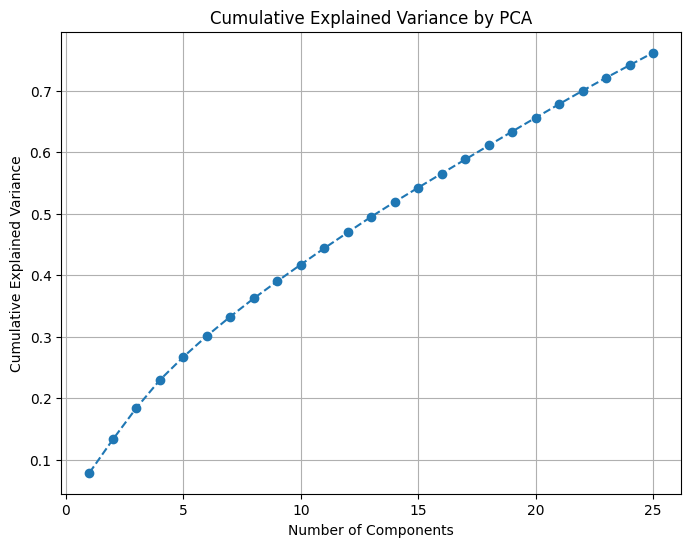

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate numerical and categorical columns
numeric_cols = sce_df.select_dtypes(include=[np.number]).columns
categorical_cols = sce_df.select_dtypes(exclude=[np.number]).columns

# One-hot encode categorical variables
encoded_categorical = pd.get_dummies(sce_df[categorical_cols], 
                                   columns=categorical_cols,
                                   drop_first=True)  # drop_first to avoid multicollinearity

# Combine with numerical columns
numeric_data = sce_df[numeric_cols]
processed_data = pd.concat([numeric_data, encoded_categorical], axis=1)

# Standardize data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Apply PCA
pca = PCA(n_components=25)  # Choose appropriate number of components
pca_fit = pca.fit(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

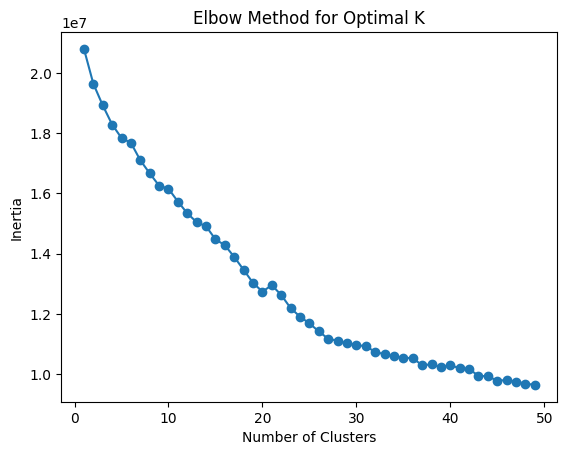

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = sce_df.drop("DiabetesTARGET", axis=1)

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(exclude=[np.number]).columns

# Impute numeric columns with median
numeric_imputer = SimpleImputer(strategy="median")
X_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(X[numeric_cols]), 
                                 columns=numeric_cols)

# Impute categorical columns with most frequent value, then encode
categorical_imputer = SimpleImputer(strategy="most_frequent")
X_categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(X[categorical_cols]), 
                                     columns=categorical_cols)

# Convert categorical columns to numeric using one-hot encoding
X_categorical_encoded = pd.get_dummies(X_categorical_imputed, columns=categorical_cols)

# Combine numeric and encoded categorical columns
X_imputed = pd.concat([X_numeric_imputed, X_categorical_encoded], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Extract the target for later comparison
y = sce_df["DiabetesTARGET"]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=27, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
X_imputed["Cluster"] = clusters
X_imputed["DiabetesTARGET"] = y

inertia = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 50), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

C:\Users\siddh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


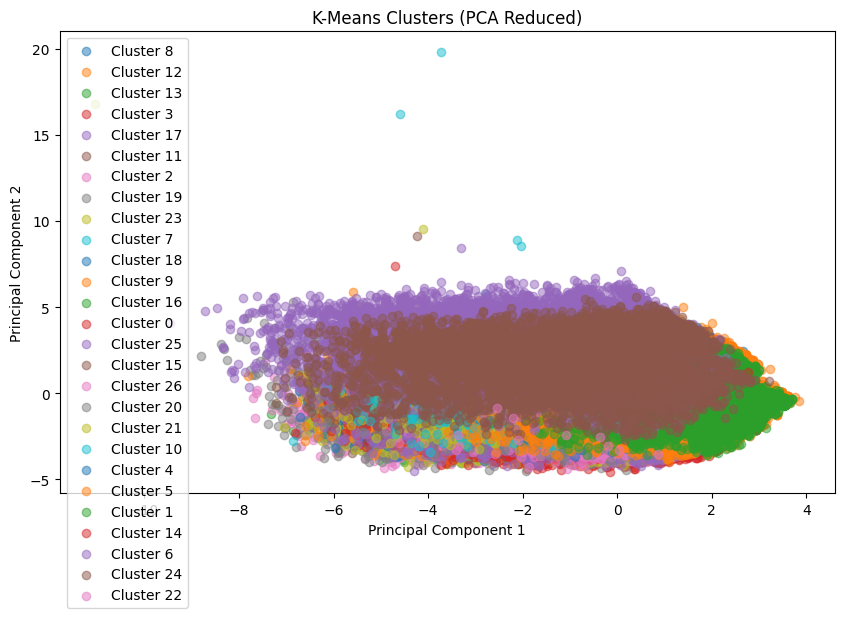

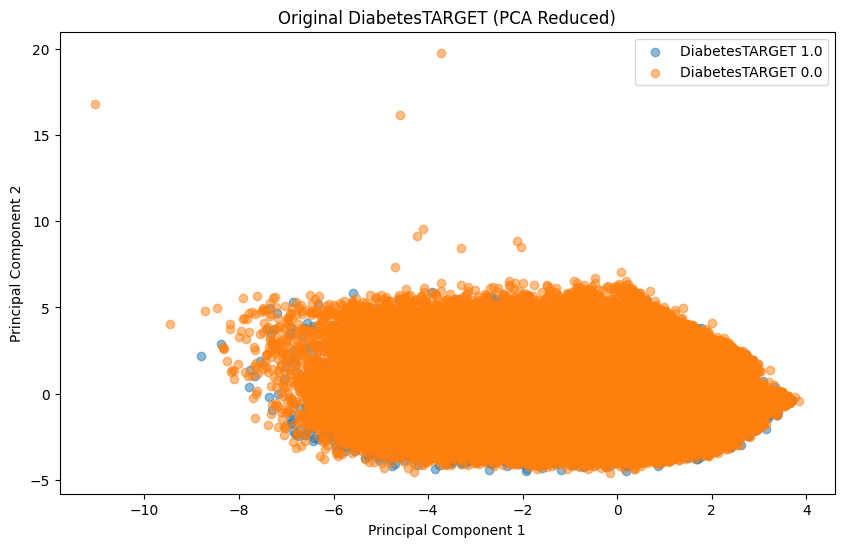

Explained variance by PC1 and PC2: 12.16%


In [23]:
# Reduce to 2 dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = clusters
pca_df["DiabetesTARGET"] = y.values

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in pca_df["Cluster"].unique():
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (PCA Reduced)")
plt.legend()
plt.show()

# Plot original DiabetesTARGET for comparison
plt.figure(figsize=(10, 6))
for dtype in pca_df["DiabetesTARGET"].unique():
    subset = pca_df[pca_df["DiabetesTARGET"] == dtype]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"DiabetesTARGET {dtype}", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Original DiabetesTARGET (PCA Reduced)")
plt.legend()
plt.show()

explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1 and PC2: {explained_variance.sum():.2%}")

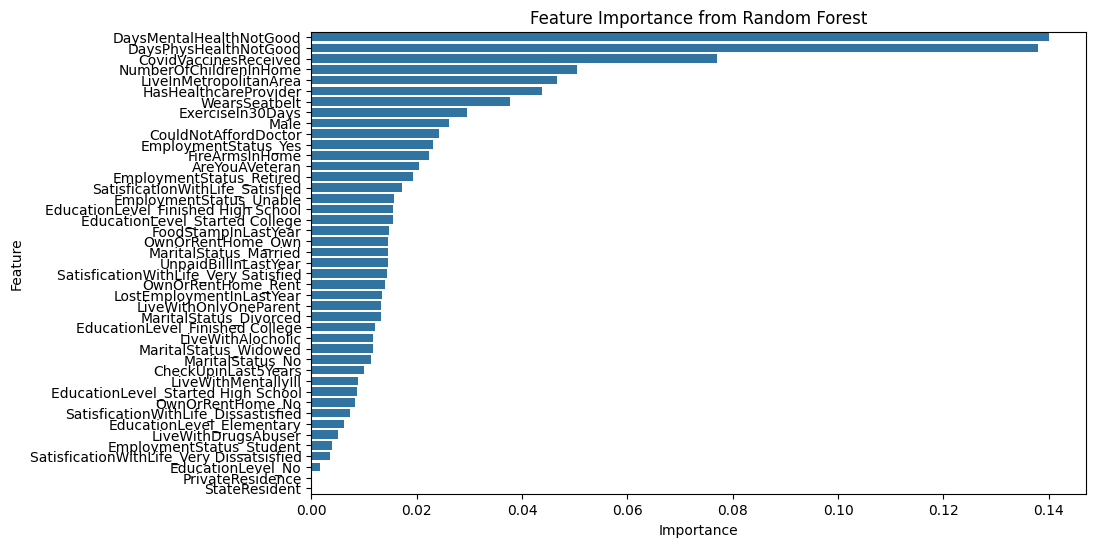

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

# Define X and y (example target: 'DiabetesType')
X = processed_data.drop("DiabetesTARGET", axis=1)
y = processed_data["DiabetesTARGET"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance from Random Forest")
plt.show()

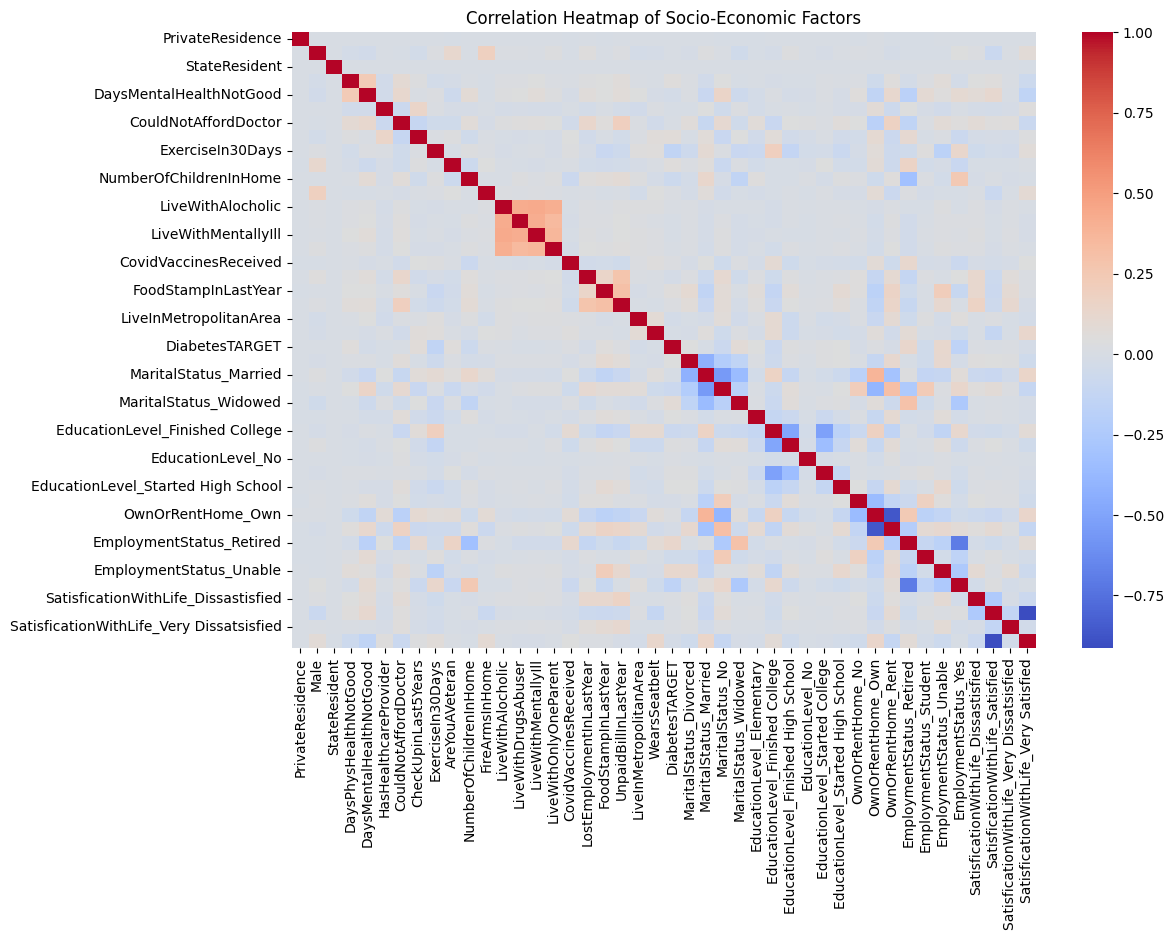

In [25]:
# Pearson correlation matrix
sce_corr = processed_data.corr(method='pearson')

# Spearman correlation for rank-based relationships (optional)
sce_corr_spearman = processed_data.corr(method='spearman')

# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(sce_corr_spearman, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap of Socio-Economic Factors")
plt.show()

In [26]:
# Core Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [27]:
# Define features and target
X = processed_data.drop("DiabetesTARGET", axis=1)
y = processed_data["DiabetesTARGET"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, device = 'cuda', n_jobs = -1) 
}

# Create pipelines with SMOTE
pipelines = {name: ImbPipeline([
    ("scaler", StandardScaler()),  # Scaling
    ("smote", SMOTE(random_state=42)),  # Apply SMOTE only on training data
    ("model", model)  # Model
]) for name, model in models.items()}

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, classification_report

# Store results
results = {}

for name, pipeline in pipelines.items():
    print(f"Training and evaluating: {name}...")
    
    # Cross-validation F1-score
    cv_f1_scores = cross_val_score(pipeline, X_train, y_train, scoring="f1_macro", cv=5)
    mean_cv_f1 = cv_f1_scores.mean()

    # Fit model on training set
    pipeline.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred = pipeline.predict(X_test)
    
    # Test set F1-score
    test_f1 = f1_score(y_test, y_pred,average="macro")
    
    # Store results
    results[name] = {"Cross-Val F1": mean_cv_f1, "Test F1": test_f1}

    print(f"Cross-Val F1 (mean over 5 folds): {mean_cv_f1:.4f}")
    print(f"Test Set F1: {test_f1:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Display summary of results
results_df = pd.DataFrame.from_dict(results, orient="index").reset_index()
results_df.rename(columns={"index": "Model"}, inplace=True)
results_df = results_df.sort_values(by="Test F1", ascending=False)

print(results_df)

Training and evaluating: Logistic Regression...
Cross-Val F1 (mean over 5 folds): 0.5440
Test Set F1: 0.5456
              precision    recall  f1-score   support

         0.0       0.92      0.63      0.75     74118
         1.0       0.23      0.66      0.34     12547

    accuracy                           0.64     86665
   macro avg       0.57      0.64      0.55     86665
weighted avg       0.82      0.64      0.69     86665

--------------------------------------------------
Training and evaluating: Random Forest...
Cross-Val F1 (mean over 5 folds): 0.5408
Test Set F1: 0.5491
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     74118
         1.0       0.23      0.23      0.23     12547

    accuracy                           0.78     86665
   macro avg       0.55      0.55      0.55     86665
weighted avg       0.78      0.78      0.78     86665

--------------------------------------------------
Training and evaluating: XGBoost

c:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:24:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:729: UserWarning: [19:24:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
c:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarn

Cross-Val F1 (mean over 5 folds): 0.5390
Test Set F1: 0.5455
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     74118
         1.0       0.25      0.17      0.20     12547

    accuracy                           0.81     86665
   macro avg       0.56      0.54      0.55     86665
weighted avg       0.78      0.81      0.79     86665

--------------------------------------------------
                 Model  Cross-Val F1   Test F1
1        Random Forest      0.540836  0.549110
0  Logistic Regression      0.543994  0.545627
2              XGBoost      0.538982  0.545470


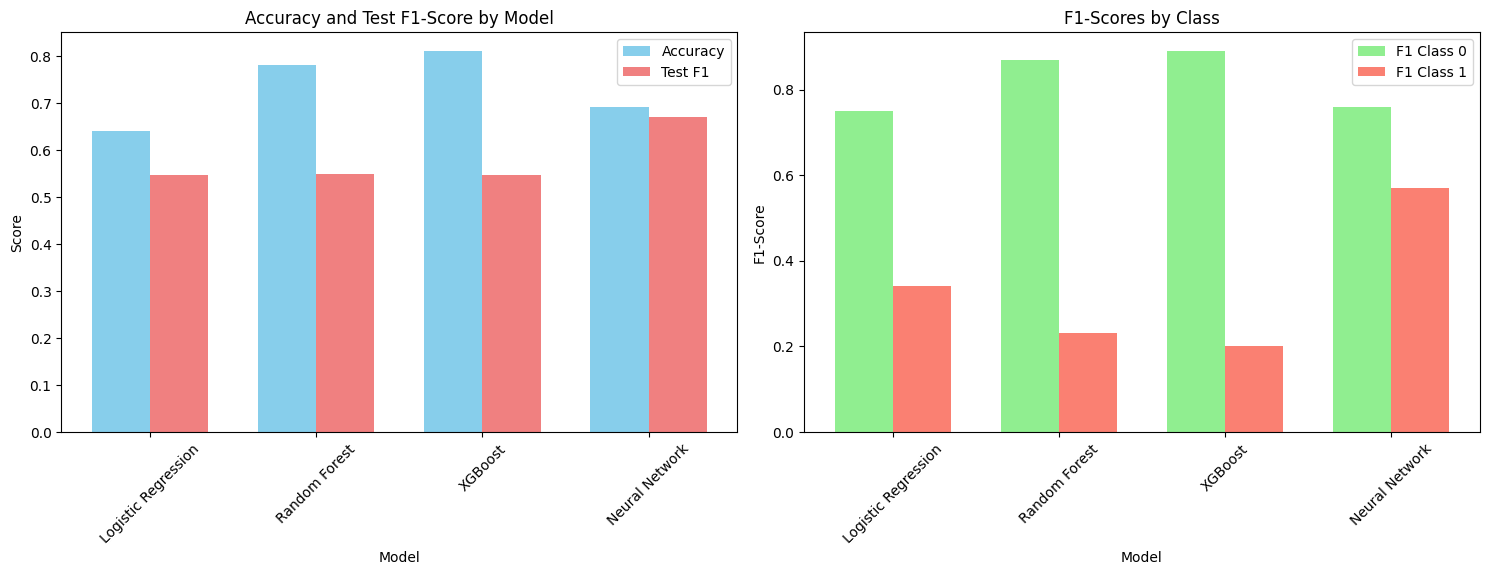

Report saved to: c:\Users\siddh\Downloads\TonyDataAndNotebook\TonyDataAndNotebook\model_comparison_report.txt
Plots saved to: c:\Users\siddh\Downloads\TonyDataAndNotebook\TonyDataAndNotebook\model_comparison_plots.png


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
import os

# ---- Model Results Data ----
models = ["Logistic Regression", "Random Forest", "XGBoost", "Neural Network"]
results = [
    {"name": "Logistic Regression", "cross_val_f1": 0.5440, "test_f1": 0.5456, "accuracy": 0.64,
     "f1_class_0": 0.75, "f1_class_1": 0.34, "precision_0": 0.92, "recall_0": 0.63,
     "precision_1": 0.23, "recall_1": 0.66, "support_0": 74118, "support_1": 12547},
    {"name": "Random Forest", "cross_val_f1": 0.5408, "test_f1": 0.5491, "accuracy": 0.78,
     "f1_class_0": 0.87, "f1_class_1": 0.23, "precision_0": 0.87, "recall_0": 0.87,
     "precision_1": 0.23, "recall_1": 0.23, "support_0": 74118, "support_1": 12547},
    {"name": "XGBoost", "cross_val_f1": 0.5390, "test_f1": 0.5455, "accuracy": 0.81,
     "f1_class_0": 0.89, "f1_class_1": 0.20, "precision_0": 0.87, "recall_0": 0.92,
     "precision_1": 0.25, "recall_1": 0.17, "support_0": 74118, "support_1": 12547},
    {"name": "Neural Network", "cross_val_f1": None, "test_f1": 0.67, "accuracy": 0.69,
     "f1_class_0": 0.76, "f1_class_1": 0.57, "precision_0": 0.79, "recall_0": 0.74,
     "precision_1": 0.54, "recall_1": 0.61, "support_0": 74057, "support_1": 37029, "roc_auc": 0.744}
]

# ---- Summary Report ----
summary = f"""
Model Comparison Report: Diabetes Prediction
============================================
Dataset: 2023 BRFSS (Imbalanced, ~14.5% Diabetic)
Test Set Size: 86,665 (Traditional Models), 111,086 (Neural Network)
============================================
Key Observations:
- XGBoost achieves the highest accuracy (81%) but the lowest diabetic class F1-score (0.20).
- Neural Network has the best diabetic class F1-score (0.57) and macro F1-score (0.67).
- Random Forest balances accuracy (78%) but struggles with diabetic class (F1: 0.23).
- Logistic Regression has the highest cross-val F1 (0.544) but low accuracy (64%).
============================================
"""

# Format comparison table
comparison_data = [
    [r["name"], f"{r['cross_val_f1']:.4f}" if r['cross_val_f1'] else "N/A",
     f"{r['test_f1']:.4f}", f"{r['accuracy']:.2%}",
     f"{r['f1_class_0']:.2f}", f"{r['f1_class_1']:.2f}"]
    for r in results
]
comparison_headers = ["Model", "Cross-Val F1", "Test F1", "Accuracy", "F1 Class 0", "F1 Class 1"]
comparison_table = tabulate(comparison_data, headers=comparison_headers, tablefmt="grid", floatfmt=".4f")

# Format detailed classification reports
detailed_reports = ""
for r in results:
    detailed_data = [
        ["Non-Diabetic (0)", r["precision_0"], r["recall_0"], r["f1_class_0"], r["support_0"]],
        ["Diabetic (1)", r["precision_1"], r["recall_1"], r["f1_class_1"], r["support_1"]],
        ["Macro Avg", (r["precision_0"] + r["precision_1"]) / 2, (r["recall_0"] + r["recall_1"]) / 2,
         (r["f1_class_0"] + r["f1_class_1"]) / 2, r["support_0"] + r["support_1"]],
        ["Weighted Avg", (r["precision_0"] * r["support_0"] + r["precision_1"] * r["support_1"]) / (r["support_0"] + r["support_1"]),
         (r["recall_0"] * r["support_0"] + r["recall_1"] * r["support_1"]) / (r["support_0"] + r["support_1"]),
         (r["f1_class_0"] * r["support_0"] + r["f1_class_1"] * r["support_1"]) / (r["support_0"] + r["support_1"]),
         r["support_0"] + r["support_1"]]
    ]
    detailed_reports += f"\n{r['name']} Classification Report:\n"
    detailed_reports += tabulate(detailed_data, headers=["Class", "Precision", "Recall", "F1-Score", "Support"],
                                tablefmt="grid", floatfmt=".2f") + "\n"

# Combine report
full_report = summary + "\nModel Comparison Table:\n" + comparison_table + "\n" + detailed_reports

# ---- Plotting ----
plt.figure(figsize=(15, 10))

# 1. Bar Plot for Accuracy and Test F1-Score
plt.subplot(2, 2, 1)
bar_width = 0.35
index = np.arange(len(models))
plt.bar(index, [r["accuracy"] for r in results], bar_width, label="Accuracy", color="skyblue")
plt.bar(index + bar_width, [r["test_f1"] for r in results], bar_width, label="Test F1", color="lightcoral")
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Accuracy and Test F1-Score by Model")
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend()

# 2. Bar Plot for Class-Specific F1-Scores
plt.subplot(2, 2, 2)
plt.bar(index, [r["f1_class_0"] for r in results], bar_width, label="F1 Class 0", color="lightgreen")
plt.bar(index + bar_width, [r["f1_class_1"] for r in results], bar_width, label="F1 Class 1", color="salmon")
plt.xlabel("Model")
plt.ylabel("F1-Score")
plt.title("F1-Scores by Class")
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend()

# Assuming y_test and y_pred for each model are available (replace with actual data)
# Example: y_pred_logreg, y_pred_rf, y_pred_xgb, y_pred_nn
# If unavailable, skip confusion matrices or re-run models to get predictions
# For demonstration, placeholders are used
# y_pred_list = [y_pred_logreg, y_pred_rf, y_pred_xgb, y_pred_nn]
# for i, (model, y_pred) in enumerate(zip(models, y_pred_list), 3):
#     cm = confusion_matrix(y_test, y_pred)
#     plt.subplot(2, 2, i)
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
#                 xticklabels=["Non-Diabetic (0)", "Diabetic (1)"],
#                 yticklabels=["Non-Diabetic (0)", "Diabetic (1)"])
#     plt.title(f"{model} Confusion Matrix")
#     plt.xlabel("Predicted")
#     plt.ylabel("True")

plt.tight_layout()
plt.savefig("model_comparison_plots.png")
plt.show()

# Save the report
with open("model_comparison_report.txt", "w") as f:
    f.write(full_report)

print(f"Report saved to: {os.path.join(os.getcwd(), 'model_comparison_report.txt')}")
print(f"Plots saved to: {os.path.join(os.getcwd(), 'model_comparison_plots.png')}")